<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/forward_selection_continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [246]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial

In [247]:
dataset = 'brookline'

### **Read In Data Set**

In [248]:
if dataset == 'brookline':
  df = pd.read_csv('/content/business-analytics/datasets/brookline.csv')
else:
  df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
  df['Students_per_Teacher'] = df['students'] / df['teachers']
df.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


### **Create Function**

In [249]:
def get_adj(reg_formula):
  linear_model  = smf.ols(reg_formula, df)
  results = linear_model.fit()
  return results.rsquared_adj, results.rsquared

if dataset == 'brookline':
  get_adj('price ~ beacon')
else:
  get_adj('math ~ expenditure')

### **Run**

In [250]:
# To Keep Track of Results
ordered_variables = []
adj_rs, rs = [], []

dep_var = 'price' if dataset == 'brookline' else 'math'
if dataset == 'brookline':
  eligible_vars = df.columns.drop(['stNumber', 'stName', 'buildingStyle', dep_var])

else:
  eligible_vars = df.columns.drop(['Unnamed: 0', 'district', 'school', 'county', 'grades', dep_var])
reg_formula = dep_var + ' ~ '


for i in range(len(eligible_vars)):
  reg_formulas = list(map(lambda x : reg_formula + ' + ' + x, eligible_vars))
  results = np.array(list(map(get_adj, reg_formulas)))
  argmax_idx = np.argmax(results[:,0])
  adj_r, r  = results[argmax_idx]
  new_reg = eligible_vars[argmax_idx]
  reg_formula = reg_formula + ' + ' + new_reg
  eligible_vars = eligible_vars.drop([new_reg])
  ordered_variables.append(new_reg)
  adj_rs.append(adj_r)
  rs.append(r)

### **Plot**

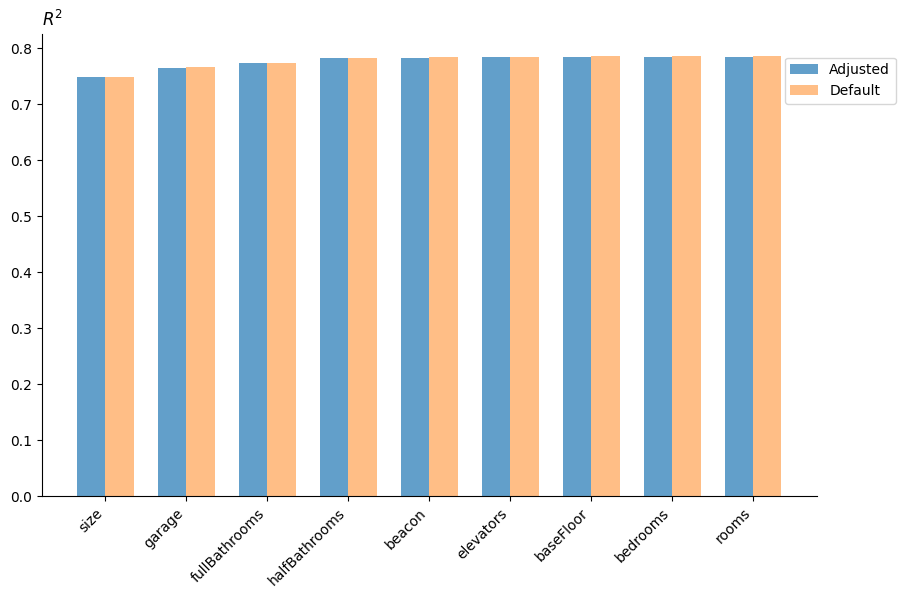

In [258]:
# Create two distinct bars for each variable by adjusting the bar positions
fig, ax = plt.subplots(figsize=(10, 6))

# Define width for bars and positions for each pair of bars
bar_width = 0.35
x = np.arange(len(ordered_variables))

# Plot adjusted R-squared and R-squared bars side by side
ax.bar(x - bar_width / 2, adj_rs, width=bar_width, label="Adjusted", alpha=0.7)
ax.bar(x + bar_width / 2, rs, width=bar_width, label="Default", alpha=0.5)

# Add labels, title, and angle the x-axis labels
ax.set_title(r"$R^2$", loc='left')
ax.set_xticks(x)
ax.set_xticklabels(ordered_variables, rotation=45, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(.95, 0.9))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()